## Students performance analysis with hypothesis check


**Data source:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [53]:
data = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [54]:
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
data.sample(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
909,male,group E,bachelor's degree,standard,completed,70,64,70
788,male,group C,associate's degree,free/reduced,none,68,65,61
640,male,group D,high school,standard,none,41,52,51
946,male,group B,high school,standard,none,82,82,80
308,female,group B,associate's degree,free/reduced,none,53,71,67


In [56]:
data.rename(columns=lambda name: name.replace(' ', '_').replace('/', '_'), inplace=True)


In [37]:
data.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
data['gender'].value_counts(normalize=True)


gender
female    0.518
male      0.482
Name: proportion, dtype: float64

In [58]:
data['parental_level_of_education'].value_counts()


parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [39]:
data['lunch'].value_counts()


lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [40]:
data['test_preparation_course'].value_counts()


test_preparation_course
none         642
completed    358
Name: count, dtype: int64

# Numeric variables

In [59]:
numeric_vars = ['math_score', 'reading_score', 'writing_score']
data[numeric_vars].describe().round()


,math_score,reading_score,writing_score
count,1000.0,1000.0,1000.0
mean,66.0,69.0,68.0
std,15.0,15.0,15.0
min,0.0,17.0,10.0
25%,57.0,59.0,58.0
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


In [60]:
data['parental_level_of_education'].value_counts()


parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [62]:
high_categories = ["associate's degree", "bachelor's degree", "master's degree", "some college"]


In [63]:
data['parents_higher_education'] = data['parental_level_of_education'].isin(high_categories)


In [64]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,parents_higher_education
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True
2,female,group B,master's degree,standard,none,90,95,93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,True
4,male,group C,some college,standard,none,76,78,75,True


In [65]:
pd.Series([1, 2]).isin([1, 2, 34])


0    True
1    True
dtype: bool

# Now - Hypothesis check

In [47]:
data.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,parents_higher_education
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True
2,female,group B,master's degree,standard,none,90,95,93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,True
4,male,group C,some college,standard,none,76,78,75,True


## Hypothesis 1. Those whose parents have higher education show a higher score

In [66]:
data_parents_higher = data[data['parents_higher_education']].reset_index(drop=True)
data_parents_nothigher = data[~data['parents_higher_education']].reset_index(drop=True)


In [67]:
data_parents_higher[numeric_vars].mean().round(2)


math_score       68.07
reading_score    71.21
writing_score    70.72
dtype: float64

In [68]:
data_parents_nothigher[numeric_vars].mean().round(2)


math_score       62.79
reading_score    65.77
writing_score    63.61
dtype: float64

In [69]:
# Calculate the difference in means for selected numeric variables between two groups:
# - 'data_parents_higher'
# and
# - 'data_parents_nothigher'

# Compute the mean for each numeric variable in both groups
# Round the means to 2 decimal places
# Subtract the means of the 'data_parents_nothigher' group from the means of the 'data_parents_higher' group

data_parents_higher[numeric_vars].mean().round(2) - data_parents_nothigher[numeric_vars].mean().round(2)

# The result, 'mean_difference', contains the differences in means for each numeric variable between the two groups


math_score       5.28
reading_score    5.44
writing_score    7.11
dtype: float64

Statistical check

In [70]:
math_parents0 = data_parents_nothigher['math_score'].values # Extract the 'math_score' values for students whose parents did not attain higher education

math_parents1 = data_parents_higher['math_score'].values # Extract the 'math_score' values for students whose parents attained higher education

mean_diff = math_parents1.mean() - math_parents0.mean() # Calculate the difference in mean 'math_score' between students with parents who attained higher education and those who did not


In [71]:
def random_diff(array1: np.ndarray, array2: np.ndarray) -> float:
    """
    Calculate the difference in means between two arrays after randomly permuting their combined elements.

    Args:
        array1 (np.ndarray): The first array of values.
        array2 (np.ndarray): The second array of values.

    Returns:
        float: The difference in means between the permuted first and second array segments.
    """
    together = np.concatenate((array1, array2)) # Concatenate the two arrays into one combined array

    together_permutated = np.random.permutation(together) # Randomly permute the combined array

    # Split the permuted array back into two segments
    var1_new = together_permutated[:array1.size]
    var2_new = together_permutated[array1.size:]

    return var1_new.mean() - var2_new.mean() # Return the difference in means between the two new arrays


By randomly permuting the combined array and calculating the difference in means for the permuted data, random_diff used in a permutation test to assess the statistical significance of the observed difference in means between array1 and array2.

random_diff helps to understand if the observed difference in means is likely due to random chance or if it is statistically significant.

In [72]:
# Number of permutations - 100,000
N = 100000

# Run permutation test 100,000 times
# For each iteration, calculate the difference in means between the permuted arrays
# Store the resulting differences in the 'mean_diffs' array

mean_diffs = np.array([random_diff(math_parents1, math_parents0) for i in range(N)])


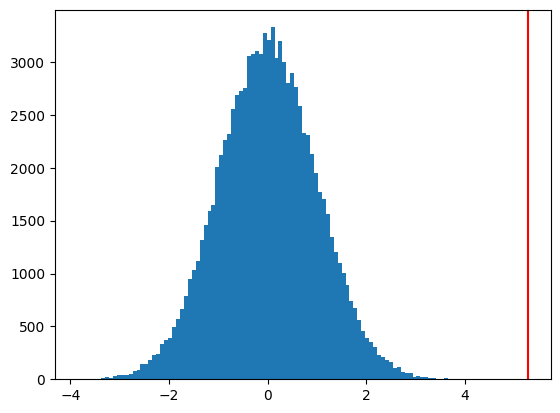

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(mean_diffs, bins=100)
ax.axvline(mean_diff, color='red');


In [78]:
# Calculate the p-value
p_value = np.sum(mean_diffs >= mean_diff) / N

print(f"Observed mean difference: {mean_diff}")
print(f"P-value: {p_value}")


Observed mean difference: 5.283733333333338
P-value: 0.0


The observed mean difference in math scores between students whose parents attained higher education and those whose parents did not is approximately 5.28 points. This suggests that, on average, students with parents who have higher education tend to score 5.28 points higher in math compared to their peers whose parents have not attained higher education.

To determine if this observed difference is statistically significant, i conducted a permutation test with 100,000 iterations. By comparing the observed mean difference to the distribution of mean differences obtained from the permutation test, we can assess the likelihood that such a difference could occur by random chance. If the observed mean difference is significantly higher than most of the differences obtained from the permutation test, it would suggest that the observed difference is statistically significant and not due to random variation

The observed mean difference of 5.28 suggests a considerable difference in math scores.
A p-value of 0.0 indicates that such a difference is very unlikely to occur by chance, providing strong evidence against the null hypothesis.

## Hypothesis 2. Knowledge of mathematics is not related to writing skills.

Checking for significance.

In [75]:
# Calculate the Pearson correlation coefficient between 'math_score' and 'writing_score'
# Extract the 'math_score' and 'writing_score' columns as numpy arrays using .values
# Use np.corrcoef to compute the correlation matrix
# Select the correlation coefficient at position [0, 1] in the matrix

real_cor = np.corrcoef(data['math_score'].values, data['writing_score'].values)[0, 1]


In [76]:
random_cors = [] # Initialize an empty list to store the correlation coefficients from randomized data

# Perform the following operation 10,000 times
for i in range(10000):
    random_cors.append(np.corrcoef(data['math_score'].values, np.random.permutation(data['writing_score'].values))[0, 1])
    # Shuffle the 'writing_score' values to create a random permutation
    # Calculate the Pearson correlation coefficient between 'math_score' and the shuffled 'writing_score'
    # Append the correlation coefficient to the list 'random_cors'

random_cors = np.array(random_cors) # Convert the list of correlation coefficients to a numpy array



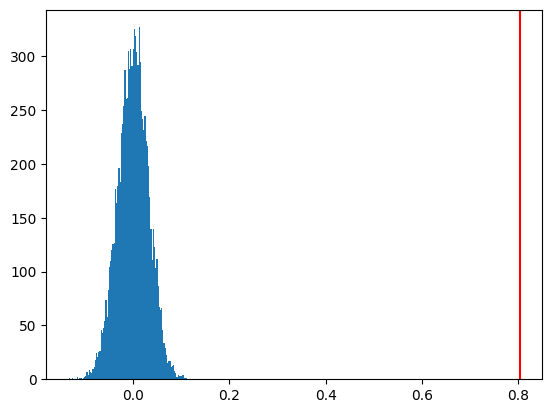

In [77]:
fig, ax = plt.subplots()

ax.hist(random_cors, bins=100)
ax.axvline(real_cor, color='red');


In [79]:
from scipy import stats


In [80]:
# Sample size
n = len(data['math_score'].values)


In [81]:
# Calculate the test statistic
t_statistic = real_cor * np.sqrt(n - 2) / np.sqrt(1 - real_cor**2)


In [82]:
# Calculate the p-value from the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n - 2))

print(f"Pearson correlation coefficient: {real_cor}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.8026420459498085
P-value: 0.0


* Statistical Significance: The p-value 0.0 strongly suggests that the observed correlation of 0.8026 is statistically significant. Therefore, i reject the null hypothesis that there is no correlation between the two variables.

* Practical Significance: The strength of the correlation (0.8026) indicates a strong positive relationship. This means that there is a meaningful and substantial linear association between the two variables in your students score dataset.